# Runge Kutta method

we want to save a differential equation numerically:

$$ y(t_0)=y_0$$

$$ t \in [t_0, \infty] $$

this is called also an $$\textbf{initial value problem}$$

# Step 1: discretize time

to use computers we discretize $ t $ into equal intervals. Then our problem is only defined at those time points.
$$ t \in \{t_0, t_1, t_2,...., t_N\} $$

$$ y(t) \in \{y(t_0), y(t_1),y(t_2),...., y(t_N) \} $$


The more discretizations, the better is our numerical calculations.

Our problem is:


$$\frac{dy}{dt}= f(t,x)$$ 

$$ y(t_0)=y_0$$

$$ t \in [t_0, \infty] $$

# Step 2: define a step size h

$\textbf{2nd order Runge Kutta}$



The difference between two time steps is $h = t_{n+1} - t_{n} $. Using Euler, the next step will be:

$$ y_{n+1} = y_n + hf(t_n,y_n) $$

We define the derivative to be:

$$ k_1 =f(t_n,y_n) $$

We can make use of the midpoint between $t_{n+1}$ and $t_n$ and evaluate the derivative at this location:

$$ k_2 = f\Bigl( t_n+ h, y_n+ hk_1\Bigr) $$

Now, we take the average of both of these derivatives in one Euler step:

Therefore, Runge Kutta second order is done via:

$$ y_{n+1} = y_n + h\frac{(k_1+k_2)}{2} $$

$\textbf{4th order Runge Kutta}$

we first start with:

$$ k_1 =f(t_n,y_n) $$





Using this step, we do an Euler step in its direction in the midopoint at $\frac{h}{2}$:

$$ k_2 =f\Bigl(t_n + \frac{h}{2},y_n + \frac{h}{2}k_1\Bigr) $$

we do another step in the midpoint direction with the updated derivative:

$$ k_3 =f\Bigl(t_n + \frac{h}{2},y_n + \frac{h}{2}k_2\Bigr) $$

we do one bigger Euler step from $t_1$ to $t_2$ using $k_3$:

$$ k_4 =f\Bigl(t_n + h,y_n +hk_3\Bigr) $$


Finally, we do one bigger Euler step from $t_1$ to $t_2$ while averaging over all direvatives:

$$ y_{n+1} = y_n + h\frac{(k_1+ 2k_2 + 2k_3 +k_4)}{6} $$

<div>
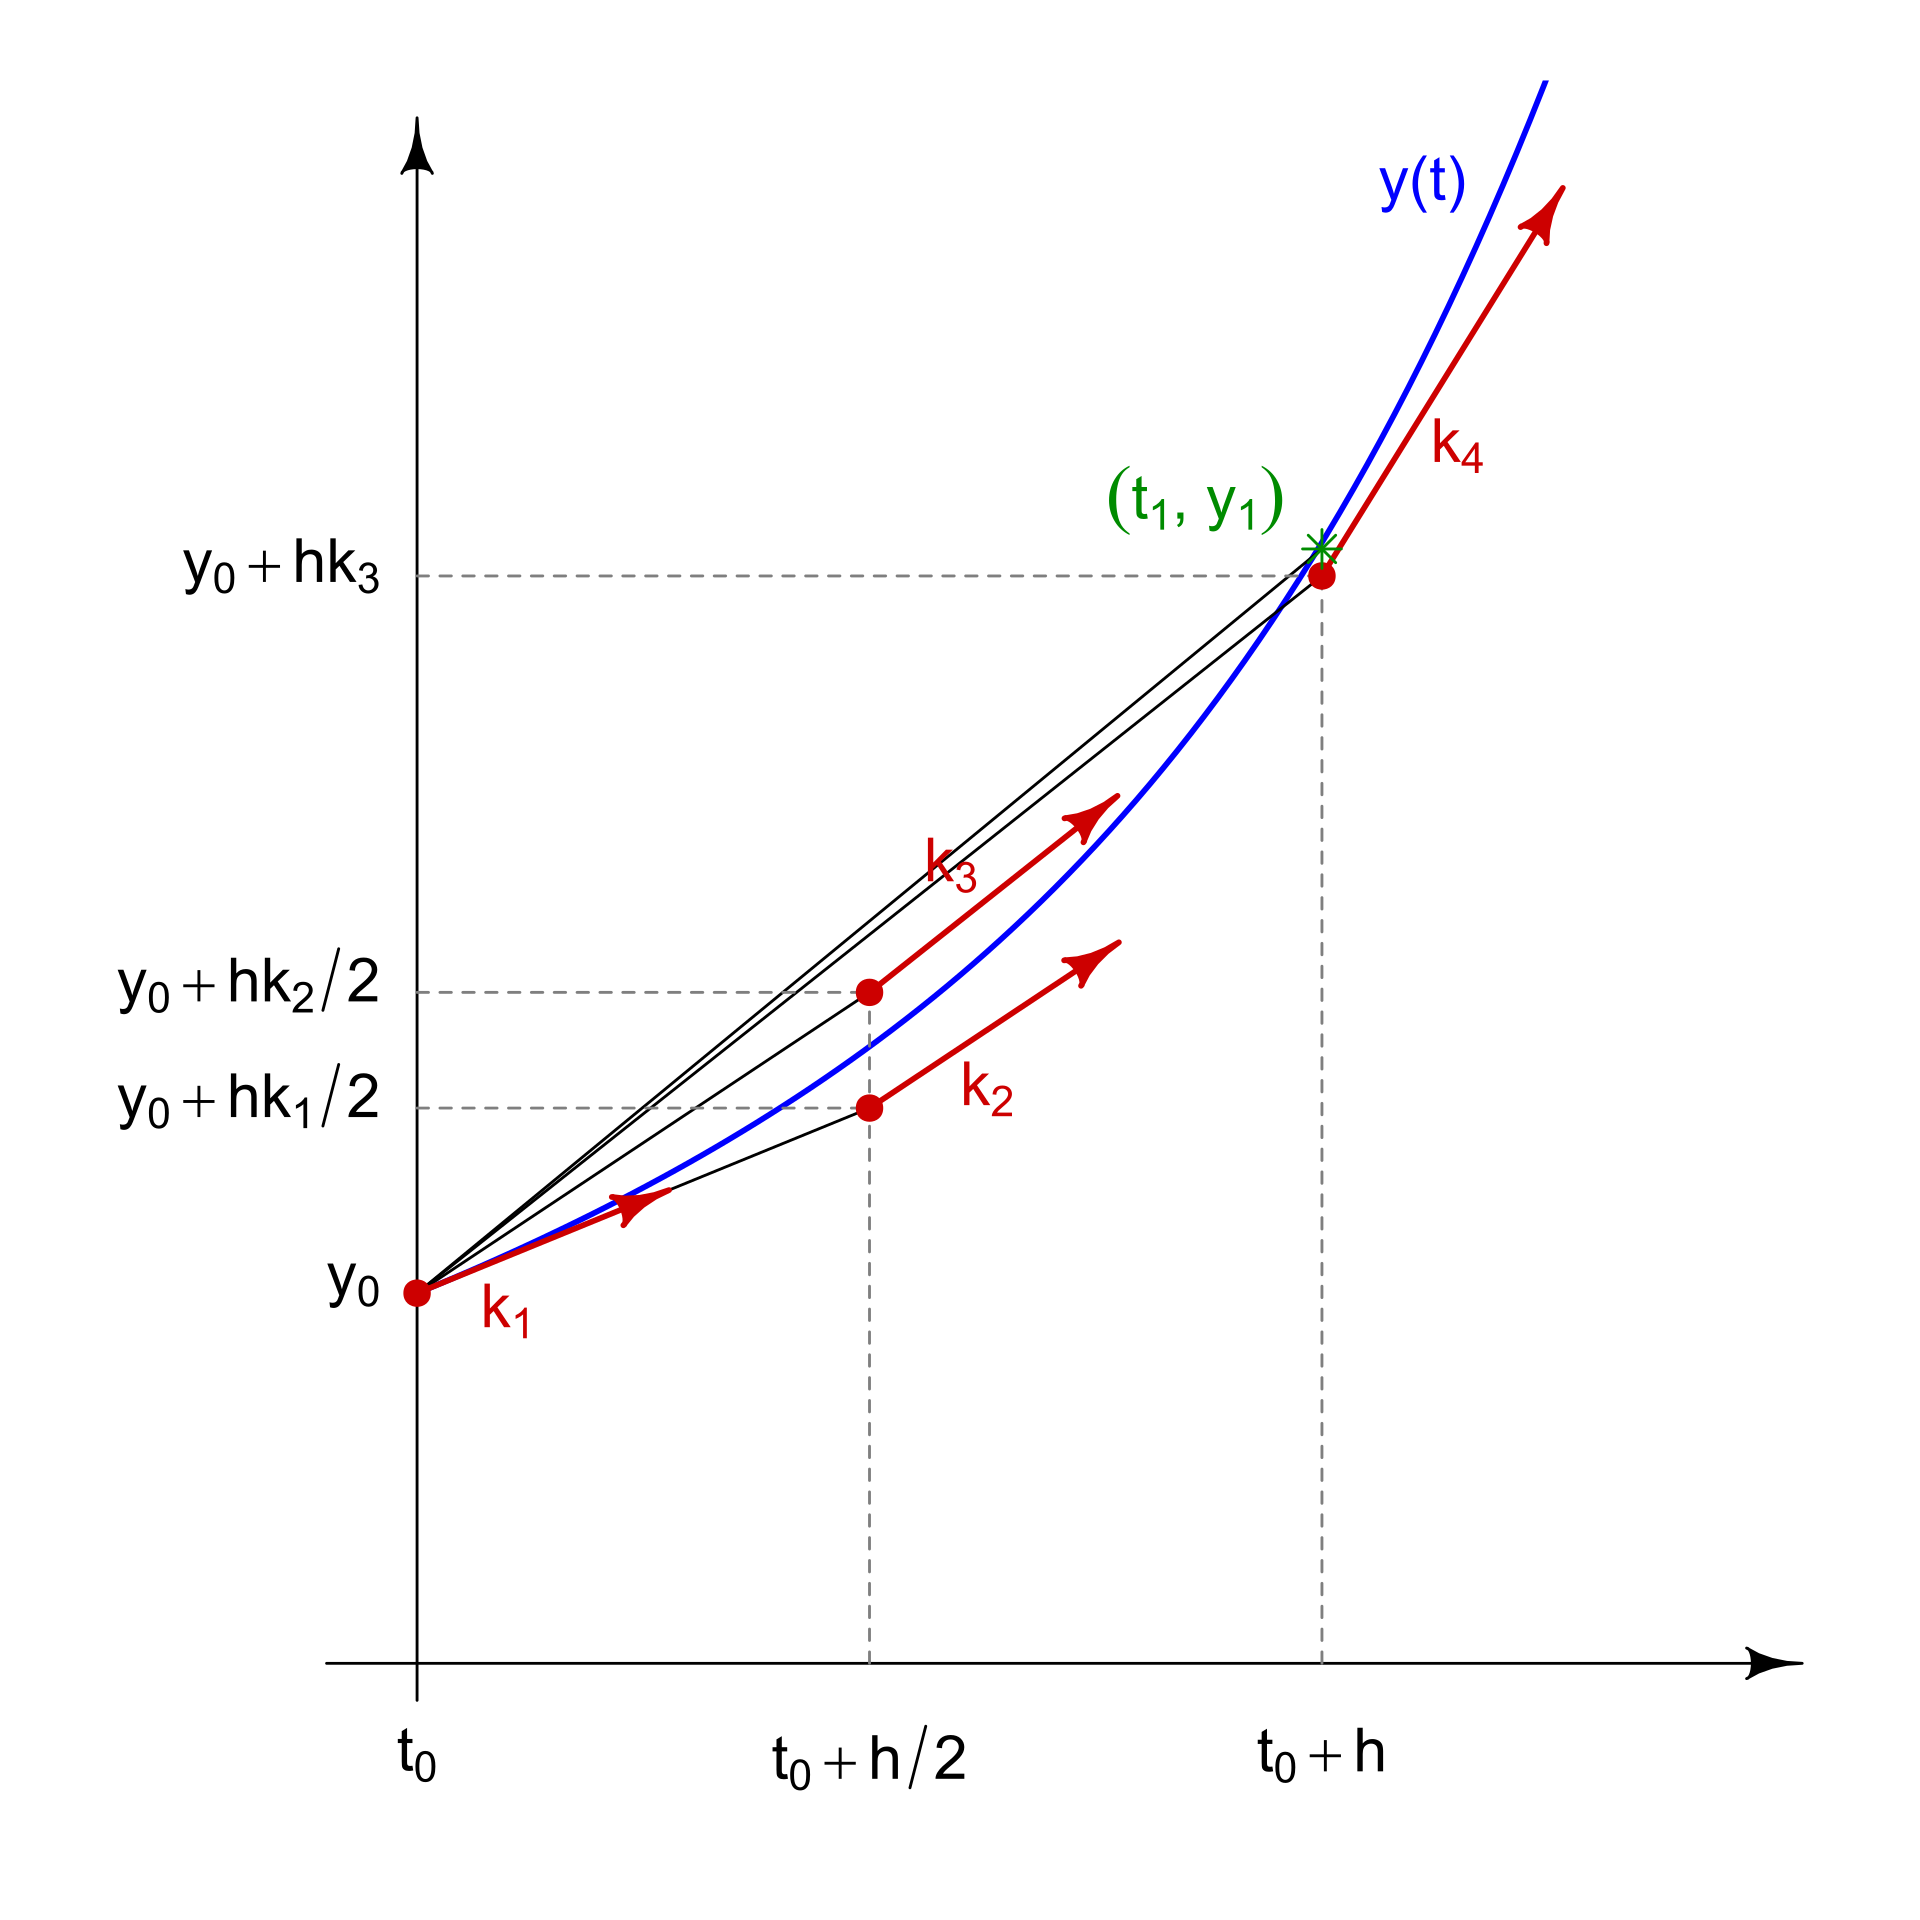
</div>

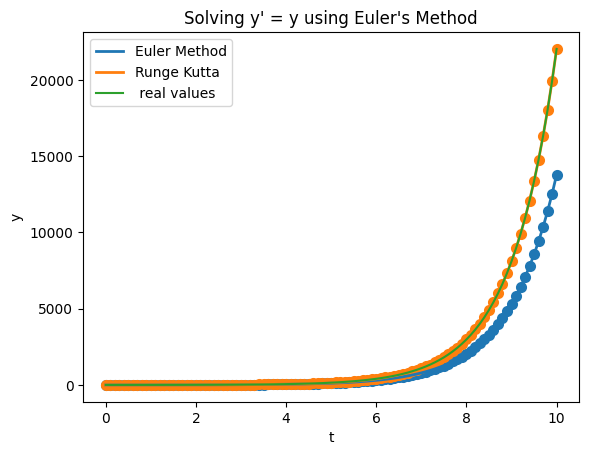

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the differential equation y' = y
def f(t, y):
    return y

# Euler's method implementation
def euler_method(f, t0, y0, h, t_end):
    t_values = np.arange(t0, t_end + h, h)
    y_values = np.zeros(len(t_values))
    y_values[0] = y0
    
    for i in range(1, len(t_values)):
        y_values[i] = y_values[i-1] + h * f(t_values[i-1], y_values[i-1])
    
    return t_values, y_values



# Runge Kutta Method

def rk4_step(f, y, t, h):
    k1 = h * f(t, y)
    k2 = h * f(t + 0.5 * h, y + 0.5 * k1)
    k3 = h * f(t + 0.5 * h, y + 0.5 * k2)
    k4 = h * f(t + h, y + k3)
    return y + (k1 + 2*k2 + 2*k3 + k4) / 6




def rk4_method(f, t0, y0, h, t_end):
    t = np.arange(t0, t_end + h, h)
    y = np.zeros(len(t))
    y[0] = y0
    
    for i in range(1, len(t)):
        y[i] = rk4_step(f, y[i-1], t[i-1], h)
    
    return t, y



# Initial conditions
t0 = 0
y0 = 1
h = 0.1
t_end = 10

# Solve the differential equation
t_values_e, y_values_e = euler_method(f, t0, y0, h, t_end)
t_values_rk, y_values_rk = rk4_method(f, t0, y0, h, t_end)




# Plot the results
plt.plot(t_values_e, y_values_e, label='Euler Method', lw = 2)
plt.scatter(t_values_e, y_values_e, lw = 2)
plt.plot(t_values_rk, y_values_rk, label='Runge Kutta', lw = 2)

plt.scatter(t_values_rk, y_values_rk, lw = 2)

plt.plot(t_values_e, np.exp(t_values_e), label = ' real values')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.title("Solving y' = y using Euler's Method")
plt.show()

# Lorenz system

It is a simplifed model that describes atmospheric convection:

$$ \frac{dx}{dt} = \sigma(y-x) $$

$$ \frac{dy}{dt} = x(\rho -z) -y$$


$$ \frac{dz}{dt} = xy -\beta z$$

where $x$ is proportional to rate of convection.
$y$ is the horizontal temprature variatio.
$z$ is the vertical temperature variation.
$\sigma$, $\rho$ and $\beta$ are physical constants.

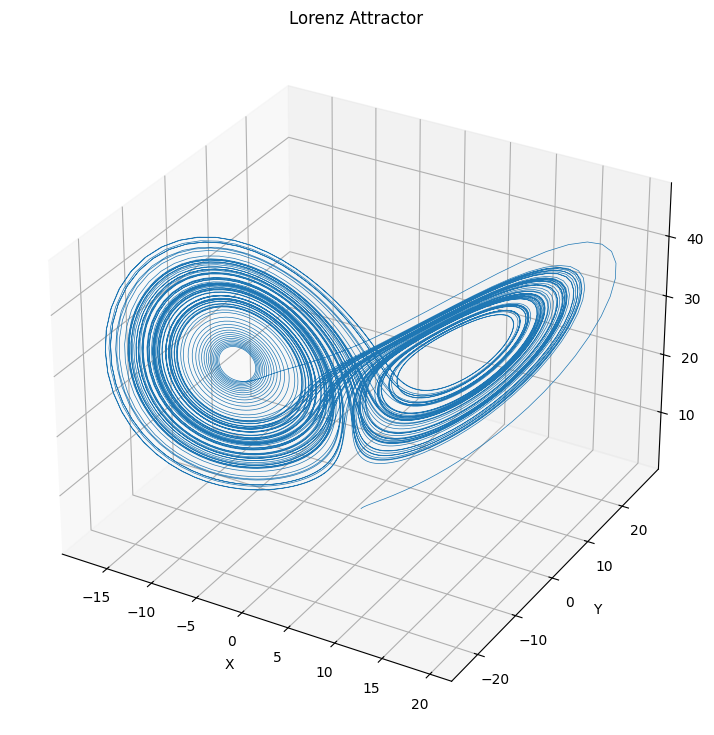

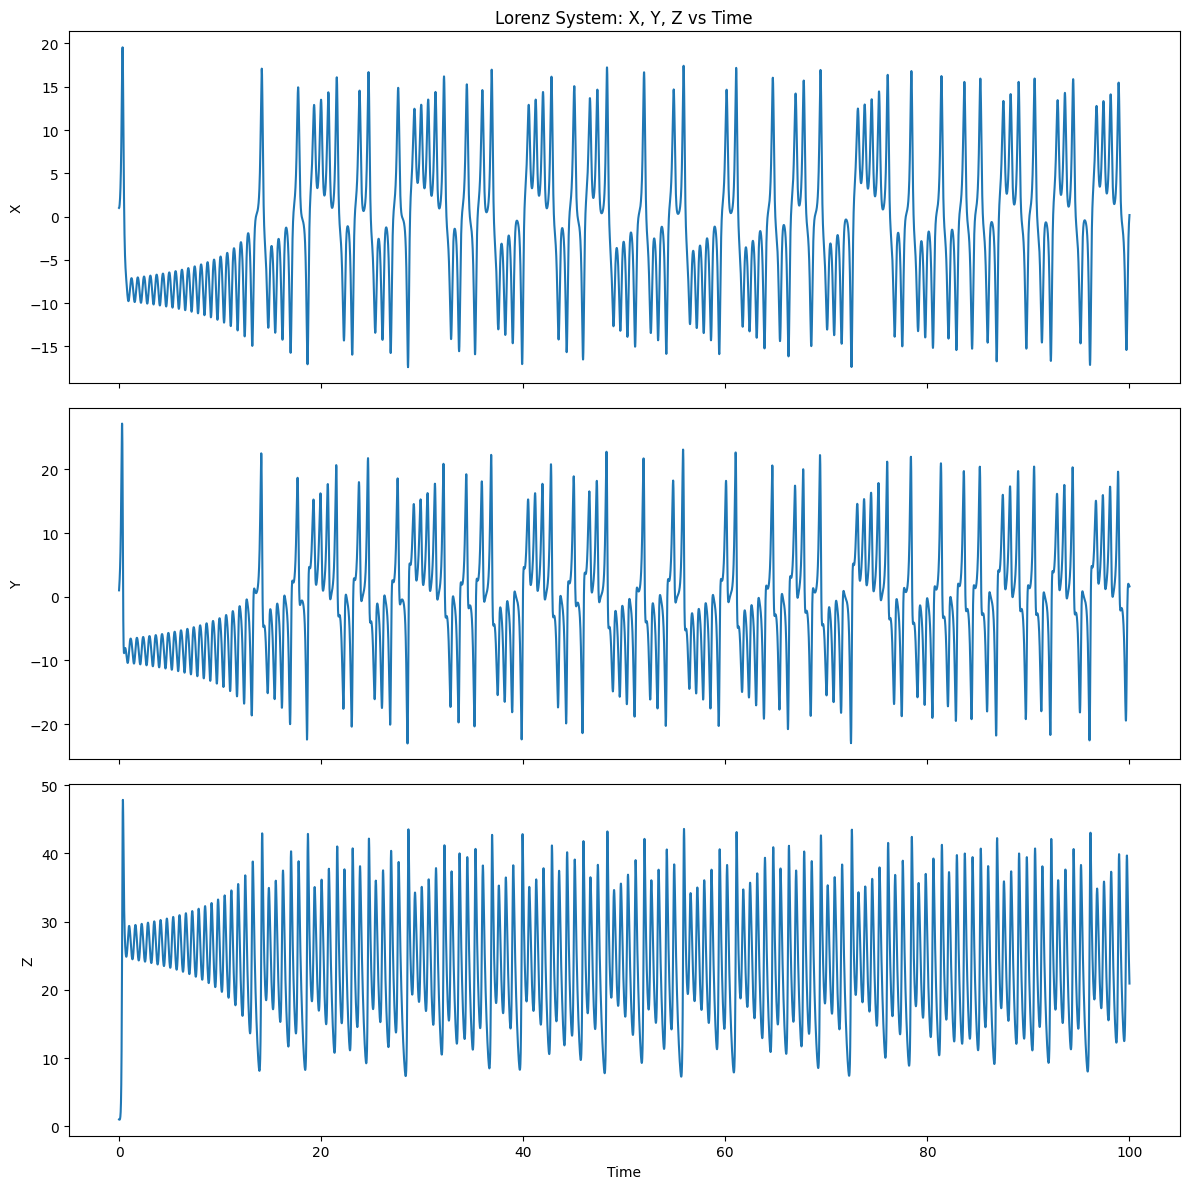

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def lorenz(X, t, sigma, rho, beta):
    """
    Given:
       X = [x, y, z]
       t = time
       sigma, rho, beta = parameters of the Lorenz system
    Returns:
       dX/dt = [dx/dt, dy/dt, dz/dt]
    """
    x, y, z = X
    return [
        sigma * (y - x),
        x * (rho - z) - y,
        x * y - beta * z
    ]

def rk4_step(f, X, t, h, sigma, rho, beta):
    k1 = h * np.array(f(X, t, sigma, rho, beta))
    k2 = h * np.array(f(X + 0.5 * k1, t + 0.5 * h, sigma, rho, beta))
    k3 = h * np.array(f(X + 0.5 * k2, t + 0.5 * h, sigma, rho, beta))
    k4 = h * np.array(f(X + k3, t + h, sigma, rho, beta))
    return X + (k1 + 2*k2 + 2*k3 + k4) / 6

def solve_lorenz(f, X0, t0, h, t_end, sigma, rho, beta):
    t = np.arange(t0, t_end + h, h)
    X = np.zeros((len(t), 3))
    X[0] = X0
    
    for i in range(1, len(t)):
        X[i] = rk4_step(f, X[i-1], t[i-1], h, sigma, rho, beta)
    
    return t, X

# Set up the problem
t0 = 0
t_end = 100
h = 0.01
X0 = [1, 1, 1]  # Initial conditions [x0, y0, z0]

# Lorenz system parameters
sigma = 10
rho = 28
beta = 8/3

# Solve the system
t1, X1 = solve_lorenz(lorenz, X0, t0, h, t_end, sigma, rho, beta)


#X0 = [1.00001, 1, 1]  # Initial conditions [x0, y0, z0]

# Lorenz system parameters
#sigma = 10
#rho = 28
#beta = 8/3

# Solve the system
#t2, X2 = solve_lorenz(lorenz, X0, t0, h, t_end, sigma, rho, beta)

# Plot the results
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')
ax.plot(X1[:, 0], X1[:, 1], X1[:, 2], lw=0.5)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Lorenz Attractor")

plt.show()

# Plot x, y, and z vs time
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 12), sharex=True)

ax1.plot(t, X1[:, 0])
#ax1.plot(t, X2[:, 0])

ax1.set_ylabel('X')
ax1.set_title('Lorenz System: X, Y, Z vs Time')

ax2.plot(t, X1[:, 1])
ax2.set_ylabel('Y')

ax3.plot(t, X1[:, 2])
ax3.set_xlabel('Time')
ax3.set_ylabel('Z')

plt.tight_layout()
plt.show()